In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [79]:
df = sns.load_dataset("flights")
df['yearMonth'] = pd.to_datetime('01-'+df['month'].astype(str)+ "-"+df['year'].astype(str))
df.head()

,year,month,passengers,yearMonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


<Axes: ylabel='passengers'>

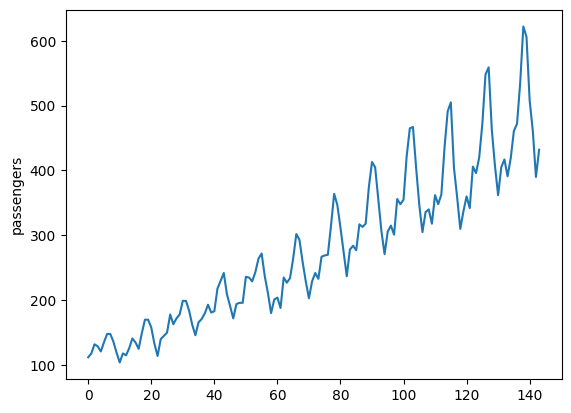

In [80]:
sns.lineplot(data=df, x=df.index, y=df.passengers)

**Rolling Statistics Test for Stationarity

In [81]:
df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

<Axes: ylabel='passengers'>

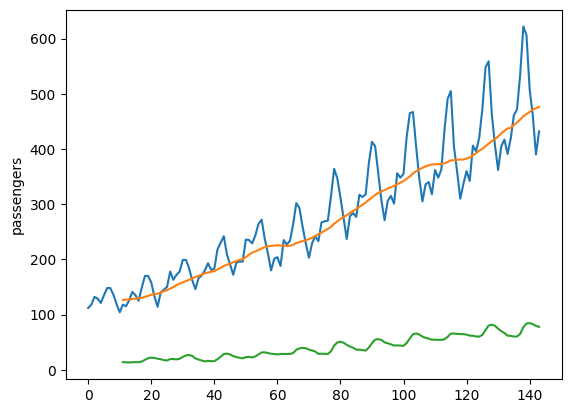

In [82]:
sns.lineplot(data=df, x=df.index, y=df.passengers)
sns.lineplot(data=df, x=df.index, y=df.rollMean)
sns.lineplot(data=df, x=df.index, y=df.rollStd)

**The above data is not stationary according to the Rolling statistics method

**ADF Test

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
adfTest = adfuller(df['passengers'], autolag='AIC')

In [85]:
adfTest

(0.8153688792060441,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [86]:
stats = pd.Series(adfTest[0:4], index=['Test Statistics','p-value', '#lags used', 'number of observations used'])
stats

Test Statistics                  0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64

In [87]:
for key, values in adfTest[4].items():
    print(key,values)

1% -3.4816817173418295
5% -2.8840418343195267
10% -2.578770059171598


**The above data is not stationary as per the ADF test also

In [88]:
def test_stationarity(dataFrame, var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()  
    
    from statsmodels.tsa.stattools import adfuller
    adfTest = adfuller(dataFrame[var],autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', '#lags used', 'number of observations used'])
    print(stats)
    
    for key,values in adfTest[4].items():
        print('criticality', key, ':', values)
        
    sns.lineplot(data=dataFrame, x=dataFrame.index, y=var)
    sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollMean')
    sns.lineplot(data=dataFrame, x=dataFrame.index, y='rollStd')

Test Statistics                  0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


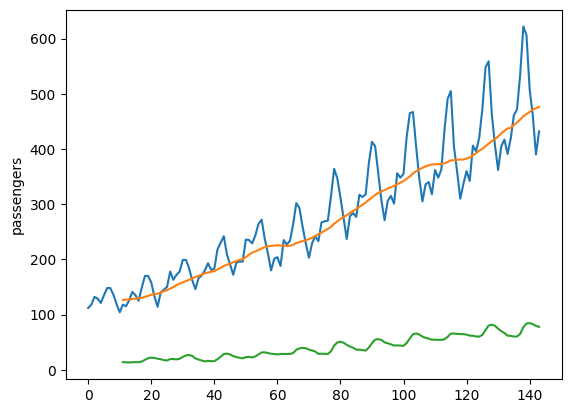

In [89]:
test_stationarity(df, 'passengers')

In [90]:
air_df = df[['yearMonth','passengers']]
air_df.head()

,yearMonth,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [91]:
#time shift method for making the data stationary

air_df['shift'] = air_df.passengers.shift()
air_df['shiftDiff'] = air_df['passengers']-air_df['shift']
air_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\4063649381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df.passengers.shift()
C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\4063649381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftDiff'] = air_df['passengers']-air_df['shift']


,yearMonth,passengers,shift,shiftDiff
0,1949-01-01,112,NaN,NaN
1,1949-02-01,118,112.0,6.0
2,1949-03-01,132,118.0,14.0
3,1949-04-01,129,132.0,-3.0
4,1949-05-01,121,129.0,-8.0


Test Statistics                 -2.829267
p-value                          0.054213
#lags used                      12.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


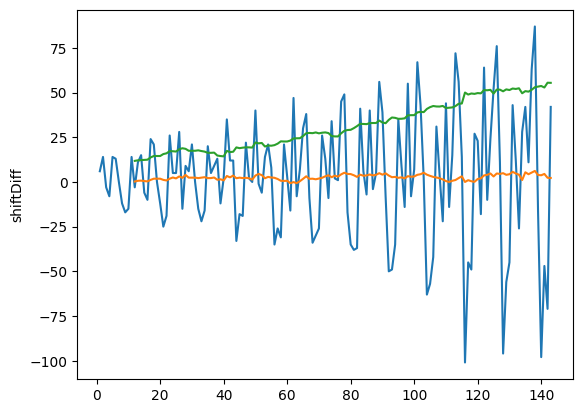

In [92]:
test_stationarity(air_df.dropna(), 'shiftDiff')

In [93]:
#log method

log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3126569147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
0,112,4.718499
1,118,4.770685
2,132,4.882802
3,129,4.859812
4,121,4.795791


Test Statistics                 -1.717017
p-value                          0.422367
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


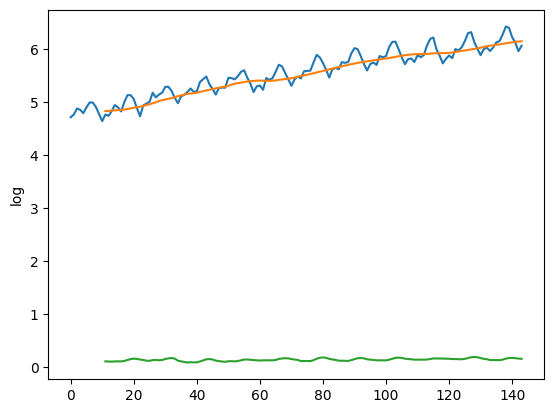

In [94]:
 test_stationarity(log_df, 'log')

**Square root method

In [95]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(df['passengers'])
sqrt_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\2486983579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(df['passengers'])


,passengers,sqrt
0,112,10.583005
1,118,10.862780
2,132,11.489125
3,129,11.357817
4,121,11.000000


Test Statistics                 -0.345854
p-value                          0.918754
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


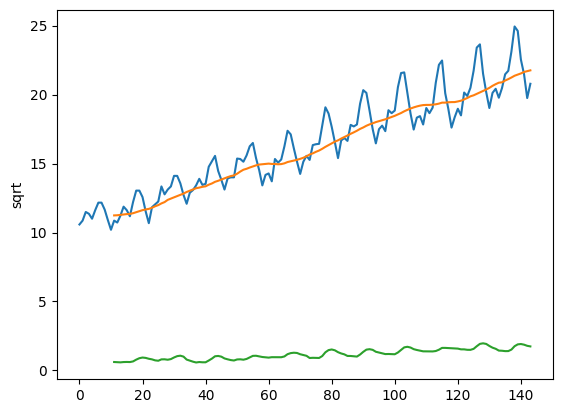

In [96]:
test_stationarity(sqrt_df, 'sqrt')

**Cube Root method

In [97]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\2059959342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])


,passengers,cbrt
0,112,4.820285
1,118,4.904868
2,132,5.091643
3,129,5.052774
4,121,4.946087


Test Statistics                 -0.810035
p-value                          0.816157
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


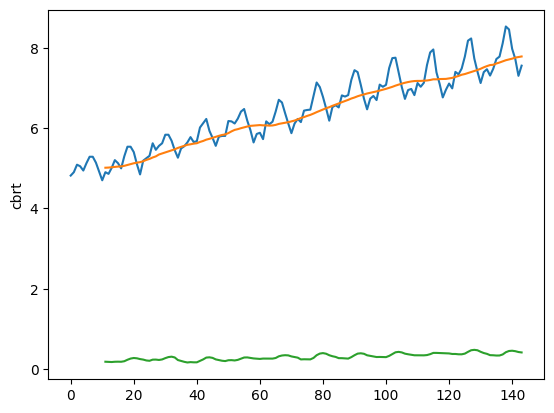

In [98]:
test_stationarity(cbrt_df, 'cbrt')

**Log and Square root

In [99]:
log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\895106553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,passengers,log,log_sqrt
0,112,4.718499,2.172211
1,118,4.770685,2.184190
2,132,4.882802,2.209706
3,129,4.859812,2.204498
4,121,4.795791,2.189929


Test Statistics                 -1.942528
p-value                          0.312326
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


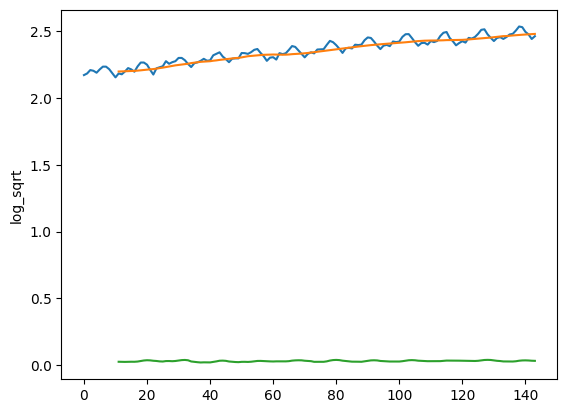

In [100]:
test_stationarity(log_df2, 'log_sqrt')

In [101]:
#log and Cube root method

log_df3 = log_df[['passengers', 'log']]
log_df3['log_cbrt'] = np.cbrt(log_df['log'])
log_df3.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3434535727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df3['log_cbrt'] = np.cbrt(log_df['log'])


,passengers,log,log_cbrt
0,112,4.718499,1.677263
1,118,4.770685,1.683424
2,132,4.882802,1.696510
3,129,4.859812,1.693843
4,121,4.795791,1.686372


Test Statistics                 -2.015066
p-value                          0.280006
#lags used                      13.000000
number of observations used    130.000000
dtype: float64
criticality 1% : -3.4816817173418295
criticality 5% : -2.8840418343195267
criticality 10% : -2.578770059171598


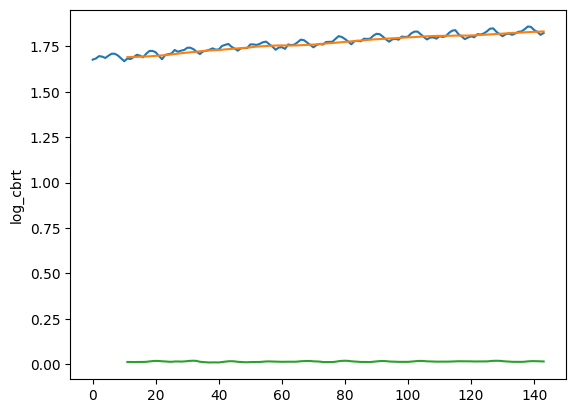

In [102]:
test_stationarity(log_df3, 'log_cbrt')

In [103]:
#log and shift method

log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df['log'])
log_df2['logShiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\2508973142.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df['log'])


,passengers,log,log_sqrt,logShiftDiff
0,112,4.718499,2.172211,NaN
1,118,4.770685,2.184190,0.011979
2,132,4.882802,2.209706,0.025517
3,129,4.859812,2.204498,-0.005208
4,121,4.795791,2.189929,-0.014569


Test Statistics                 -2.611019
p-value                          0.090741
#lags used                      14.000000
number of observations used    128.000000
dtype: float64
criticality 1% : -3.4825006939887997
criticality 5% : -2.884397984161377
criticality 10% : -2.578960197753906


C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\ACER\AppData\Local\Temp\ipykernel_18612\3956775504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


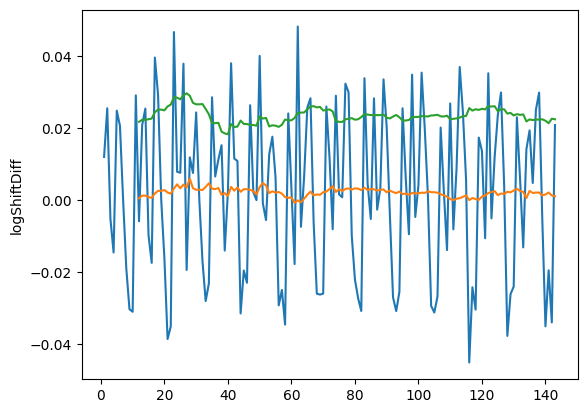

In [104]:
test_stationarity(log_df2.dropna(), 'logShiftDiff')

# ARIMA MODEL

In [105]:
airP = df[['passengers', 'yearMonth']].copy(deep=True)

In [106]:
airP.head()

,passengers,yearMonth
0,112,1949-01-01
1,118,1949-02-01
2,132,1949-03-01
3,129,1949-04-01
4,121,1949-05-01


In [107]:
airP['firstDiff'] = airP['passengers'].diff()
airP['DIff12'] = airP['passengers'].diff(12)
airP.head()

,passengers,yearMonth,firstDiff,DIff12
0,112,1949-01-01,NaN,NaN
1,118,1949-02-01,6.0,NaN
2,132,1949-03-01,14.0,NaN
3,129,1949-04-01,-3.0,NaN
4,121,1949-05-01,-8.0,NaN


In [108]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

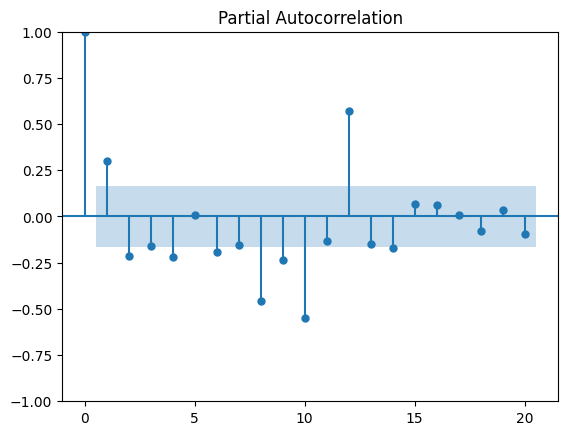

In [109]:
plot_pacf(airP['firstDiff'].dropna(), lags=20);

In [110]:
# p = 1, q=3, d=1

In [115]:
train = airP[:round(len(airP)*70/100)]
test = airP[round(len(airP)*70/100):]
test.head()

,passengers,yearMonth,firstDiff,DIff12
101,422,1957-06-01,67.0,48.0
102,465,1957-07-01,43.0,52.0
103,467,1957-08-01,2.0,62.0
104,404,1957-09-01,-63.0,49.0
105,347,1957-10-01,-57.0,41.0


In [122]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['passengers'], order=(1, 1, 3))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
airP['arimaPred'] = prediction
airP.tail()

,passengers,yearMonth,firstDiff,DIff12,arimaPred
139,606,1960-08-01,-16.0,47.0,341.111333
140,508,1960-09-01,-98.0,45.0,341.111333
141,461,1960-10-01,-47.0,54.0,341.111333
142,390,1960-11-01,-71.0,28.0,341.111333
143,432,1960-12-01,42.0,27.0,341.111333


<Axes: ylabel='passengers'>

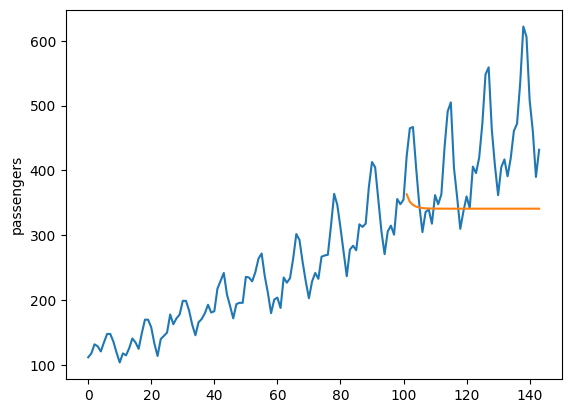

In [126]:
airP.dropna()
sns.lineplot(data=airP, x=airP.index, y ='passengers')
sns.lineplot(data=airP, x=airP.index, y ='arimaPred')

In [127]:
from sklearn.metrics import mean_squared_error

In [128]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

111.11010331521715

# SARIMAX MODEL

In [130]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

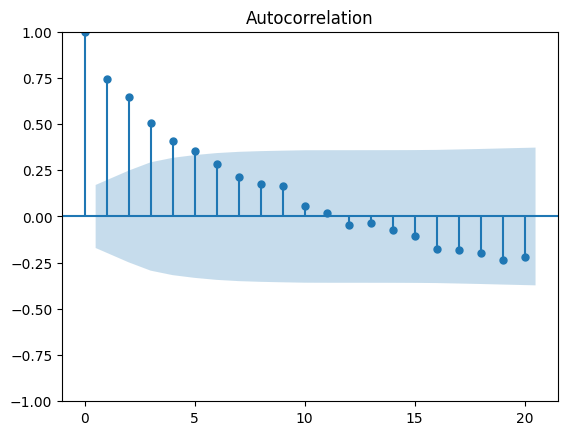

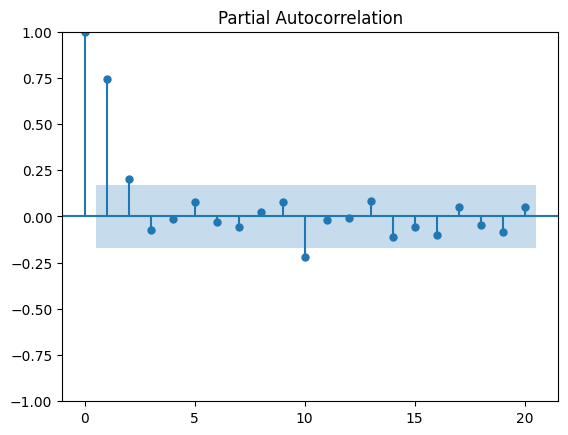

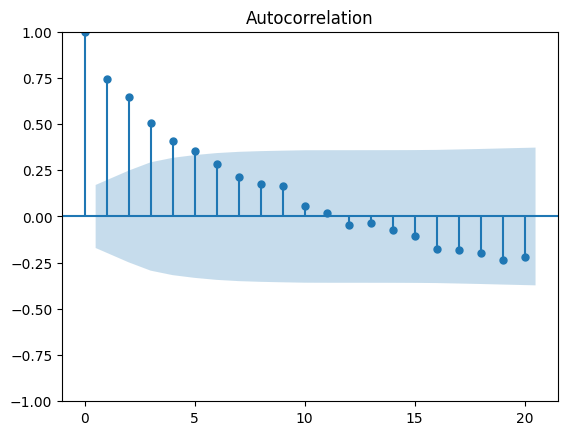

In [148]:
plot_pacf(airP['DIff12'].dropna(), lags=20)
plot_acf(airP['DIff12'].dropna(), lags=20)

In [149]:
model = SARIMAX(train['passengers'], order=(1, 1, 3), seasonal_order=(1,1,3,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
airP['sarimaxPred'] = prediction

C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: ylabel='passengers'>

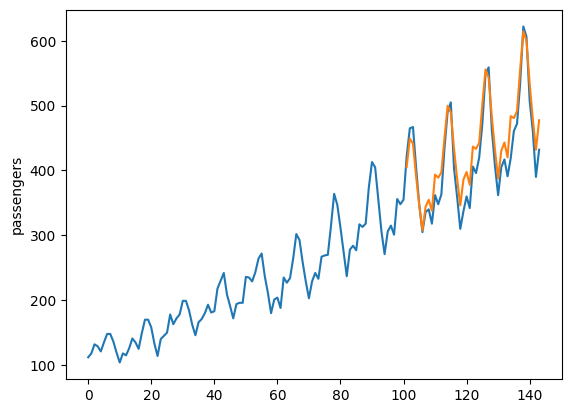

In [161]:
airP.dropna()
sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')

In [162]:
np.sqrt(mean_squared_error(test['passengers'],prediction))

27.679617817036604

In [170]:
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)
futureDate.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [174]:
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1])

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'